In [1]:
from fastai.vision.all import *
#plt.style.use('dark_background')

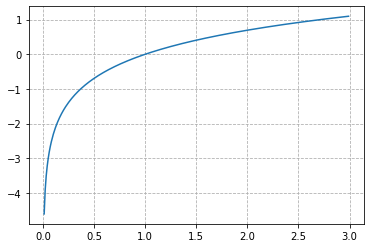

In [2]:
x = torch.arange(0,3,0.01)
y = torch.log(x)
plt.plot(x, y)
plt.grid(True, linestyle='--')

## 15

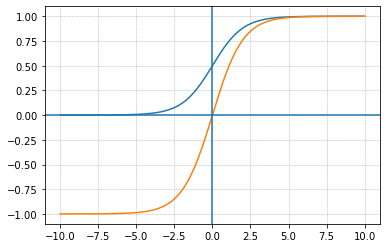

In [3]:
x = torch.arange(-10, 10, 0.01)
y = torch.sigmoid(x)
def sigmoid_range(x, hi, lo):
    return torch.sigmoid(x)*(hi-lo)+lo

plt.plot(x, y)
plt.plot(x, sigmoid_range(x, 1, -1))
plt.grid(True, linestyle='--', linewidth=0.5)
plt.axhline(y=0)
plt.axvline(x=0)

## Pandas Tutorial Stuff

In [4]:
my_array = np.ones(3, dtype=([('foo', int), ('bar', float)]))
my_array

array([(1, 1.), (1, 1.), (1, 1.)], dtype=[('foo', '<i8'), ('bar', '<f8')])

In [5]:
my_array['foo']

array([1, 1, 1])

In [6]:
my_array['bar']

array([1., 1., 1.])

In [7]:
my_array2 = my_array.view(np.recarray)
my_array2

rec.array([(1, 1.), (1, 1.), (1, 1.)],
          dtype=[('foo', '<i8'), ('bar', '<f8')])

In [8]:
my_array2.foo

array([1, 1, 1])

In [9]:
my_array2.bar

array([1., 1., 1.])

------

In [10]:
data = np.array([['','col1','col2'],
                ['row1',1,2],
                ['row2',3,4]])
data

array([['', 'col1', 'col2'],
       ['row1', '1', '2'],
       ['row2', '3', '4']], dtype='<U4')

In [11]:
df = pd.DataFrame(data=data[1:,1:],   # values
                 index=data[1:,0],    # row names
                 columns=data[0,1:])  # column names
df

,col1,col2
row1,1,2
row2,3,4


In [12]:
data[1:,0]

array(['row1', 'row2'], dtype='<U4')

In [13]:
data[0,1:]

array(['col1', 'col2'], dtype='<U4')

------

In [14]:
my2dArray = np.array([[1,2,3],[4,5,6]])
print(my2dArray)
pd.DataFrame(my2dArray)

[[1 2 3]
 [4 5 6]]


,0,1,2
0,1,2,3
1,4,5,6


In [15]:
myDict = {1: ['1','3'], 2: ['1','2'], 3: ['2','4']}
print(myDict)
pd.DataFrame(myDict)

{1: ['1', '3'], 2: ['1', '2'], 3: ['2', '4']}


,1,2,3
0,1,1,2
1,3,2,4


In [16]:
myDf = pd.DataFrame(data=[4,5,6,7], index=range(0,4), columns=['A'])
myDf

,A
0,4
1,5
2,6
3,7


In [17]:
mySeries = pd.Series({'United Kingdom':'London', 'India':'New Delhi', 'United States':'Washington', 'Belgium':'Brussels'})
mySeries

United Kingdom        London
India              New Delhi
United States     Washington
Belgium             Brussels
dtype: object

In [18]:
my2dArray.shape

(2, 3)

In [19]:
len(my2dArray)

2

In [20]:
print(df.columns)
print(df.columns.values)
print(list(df.columns.values))

Index(['col1', 'col2'], dtype='object')
['col1' 'col2']
['col1', 'col2']


------

In [21]:
df = pd.DataFrame(data=[[1,2,3],[4,5,6],[7,8,9]], columns=['A','B','C'])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [22]:
print(df['A'][0])
print(df.iloc[0,0])
print(df.loc[0,'A'])

1
1
1


------

In [23]:
arr = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
df = pd.DataFrame(data=arr, columns=['A', 'B', 'C'])
print(arr)
df

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [24]:
df.set_index('C')

,A,B
C,,
3,1,2
6,4,5
9,7,8


### Append a column with index values

In [25]:
df['D'] = df.index
df

,A,B,C,D
0,1,2,3,0
1,4,5,6,1
2,7,8,9,2


In [26]:
df = pd.DataFrame(data=arr, columns=['A', 'B', 'C'])
df.loc[:,3] = pd.Series([9,9,9])
df

,A,B,C,3
0,1,2,3,9
1,4,5,6,9
2,7,8,9,9


### Column Addition

In [27]:
df['four'] = df['A']+df['B']
df

,A,B,C,3,four
0,1,2,3,9,3
1,4,5,6,9,9
2,7,8,9,9,15


### Column Deletion

In [28]:
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd']), 
   'three' : pd.Series([10,20,30], index=['a','b','c'])}
df = pd.DataFrame(d)
df

,one,two,three
a,1.0,1,10.0
b,2.0,2,20.0
c,3.0,3,30.0
d,NaN,4,NaN


In [29]:
df.pop('two')
df

,one,three
a,1.0,10.0
b,2.0,20.0
c,3.0,30.0
d,NaN,NaN


In [30]:
del df['three']
df

,one
a,1.0
b,2.0
c,3.0
d,NaN


### Row Addition

In [31]:
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])
df

,a,b
0,1,2
1,3,4


In [32]:
df = df.append(df2)
df

,a,b
0,1,2
1,3,4
0,5,6
1,7,8


In [33]:
df = df.drop(0)
df

,a,b
1,3,4
1,7,8


# Bear Classifier with Multi-label Classification

In [34]:
!pip install bing-image-downloader
from bing_image_downloader import downloader

downloader.download("grizzly bear", limit=150, output_dir='../data/bears', adult_filter_off=True, force_replace=False, timeout=5)
downloader.download("black bear", limit=150, output_dir='../data/bears', adult_filter_off=True, force_replace=False, timeout=5)
downloader.download("teddy bear", limit=150, output_dir='../data/bears', adult_filter_off=True, force_replace=False, timeout=5)

path = Path('../data/bears/grizzly bear')
path.rename('../data/bears/grizzly')
path = Path('../data/bears/black bear')
path.rename('../data/bears/black')
path = Path('../data/bears/teddy bear')
path.rename('../data/bears/teddy')



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://img.thedailybeast.com/image/upload/c_crop,d_placeholder_euli9k,h_1439,w_2560,x_0,y_0/dpr_2.0/c_limit,w_740/fl_lossy,q_auto/v1492115392/articles/2016/03/19/we-re-putting-grizzlies-in-the-crosshairs/150821-peacock-grizzlies-tease_gxhyz8
[%] File Downloaded !

[%] Downloading Image #2 from http://www.sportsmanstaxidermy.com/images/IMG_0989.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapershome.com/images/wallpapers/warcraft-1080x1920-ork-wolf-best-movies-of-2016-10726.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.animalfactsencyclopedia.com/images/grizzlyportrait.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://3dprint.com/wp-content/uploads/2014/11/bear3.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/736x/45/a5/01/45a50166417bb47d076351d0d7e22183--bronx-zoo-grizzly.jpg
[%] File Downloaded !

[%] Down

[%] File Downloaded !

[%] Downloading Image #47 from http://3dprint.com/wp-content/uploads/2014/11/bear3.jpg
[%] File Downloaded !

[%] Downloading Image #48 from https://wallpapershome.com/images/wallpapers/warcraft-1080x1920-ork-wolf-best-movies-of-2016-10726.jpg
[%] File Downloaded !

[%] Downloading Image #49 from http://cdn.onlyinyourstate.com/wp-content/uploads/2017/03/bat-3941744363-700x700.jpg
[%] File Downloaded !

[%] Downloading Image #50 from https://i.neoseeker.com/p/827/61/planet-zoo_image_MyzEf.jpg
[%] File Downloaded !



[!!]Indexing page: 6

[%] Indexed 8 Images on Page 6.


[%] Downloading Image #51 from http://www.tattoosforyou.org/wp-content/uploads/2013/10/Pictures-of-Bear-Tattoo.jpg
[%] File Downloaded !

[%] Downloading Image #52 from http://cdn.iflscience.com/images/0a4b0b77-57b9-5905-bcbb-9405528ed31a/default-1464356574-1705-fat-grizzlies-reveal-natural-reversible-diabetes.jpg
[%] File Downloaded !

[%] Downloading Image #53 from https://tailandfur.com/wp-con

[%] File Downloaded !

[%] Downloading Image #84 from http://news.nationalgeographic.com/content/dam/news/photos/000/131/13169.ngsversion.1421960645604.adapt.1900.1.jpg
[!] Issue getting: http://news.nationalgeographic.com/content/dam/news/photos/000/131/13169.ngsversion.1421960645604.adapt.1900.1.jpg
[!] Error:: HTTP Error 503: Service Unavailable
[%] Downloading Image #84 from https://www.thecountryworkshop.com/i/Chaisaw%20carving/BEARS_4-07-08_003.jpg
[%] File Downloaded !

[%] Downloading Image #85 from http://www.stlzoo.org/files/1314/2541/7334/Grizzly_Bear_Bert_Ray_Meibaum_Saint_Louis_Zoo_web.jpg
[%] File Downloaded !

[%] Downloading Image #86 from https://www.gamepur.com/files/images/2018-11/red-dead-redemption-2-bear-hunter-outfit-guide.jpg
[%] File Downloaded !

[%] Downloading Image #87 from http://www.wallpapers13.com/wp-content/uploads/2016/07/White-polar-bears-par-crbeni-clouds-sunset-Desktop-backgrounds-free-download-for-windows-1920x1440.jpg
[%] File Downloaded !

[%] D

[%] File Downloaded !

[%] Downloading Image #128 from https://thumbs.dreamstime.com/x/bear-skull-1658927.jpg
[%] File Downloaded !

[%] Downloading Image #129 from https://weneedfun.com/wp-content/uploads/2016/08/Brazilian-Wandering-Spider-162.jpg
[%] File Downloaded !

[%] Downloading Image #130 from https://www.getaway.co.za/wp-content/uploads/2020/06/iUBrzKOA.jpg
[%] File Downloaded !

[%] Downloading Image #131 from http://www.pawmygosh.com/wp-content/uploads/2014/07/hybrids.png
[%] File Downloaded !

[%] Downloading Image #132 from https://crazyhyena.com/imagebank/g/funny-Putin-riding-animals-photoshop-gallery_1.jpg
[%] File Downloaded !

[%] Downloading Image #133 from https://www.wallpapers13.com/wp-content/uploads/2016/04/Cheetahs-cubs-and-big-cats-predators-HD-Wallpaper-3840x2400-1024x768.jpg
[%] File Downloaded !

[%] Downloading Image #134 from https://files.scary-movies.de/bear.jpg
[%] File Downloaded !



[!!]Indexing page: 19

[%] Indexed 12 Images on Page 19.


[%] Down

[%] Indexed 10 Images on Page 3.


[%] Downloading Image #22 from https://en.wikifur.com/w/images/thumb/1/19/Fursuit_Arno.JPG/372px-Fursuit_Arno.JPG
[%] File Downloaded !

[%] Downloading Image #23 from https://www.hdwallpapers.in/download/chicago_sunset-1280x720.jpg
[%] File Downloaded !

[%] Downloading Image #24 from http://japari-library.com/w/images/e/e4/KF3_White_Rhinoceros_(Photo).png
[%] File Downloaded !

[%] Downloading Image #25 from https://wallpapershome.com/images/wallpapers/grass-3840x2160-hd-4k-wallpaper-macro-drops-green-5483.jpg
[%] File Downloaded !

[%] Downloading Image #26 from http://4.bp.blogspot.com/-QQY-T0vYy8c/UbLu1v25dJI/AAAAAAAAa8s/MmmP-ye2yhU/s1600/black&amp;white+look+street+style+sporty+chic+nike+top+booties+fashion+trends.jpg
[%] File Downloaded !

[%] Downloading Image #27 from https://www.hdwallpapers.in/download/captain_america_artwork_4k-1280x720.jpg
[%] File Downloaded !

[%] Downloading Image #28 from https://cdn.onlyinyourstate.com/wp-content/upl

[%] File Downloaded !



[!!]Indexing page: 10

[%] Indexed 4 Images on Page 10.


[%] Downloading Image #71 from https://www.hdwallpapers.in/download/arctic_fox_hd-1366x768.jpg
[%] File Downloaded !

[%] Downloading Image #72 from https://spongekids.com/wp-content/uploads/2014/04/pipe-cleaner-animals/36-pipe-cleaner-rhino.jpg
[%] File Downloaded !

[%] Downloading Image #73 from https://weneedfun.com/wp-content/uploads/2016/03/Museum-Island-in-Berlin-8.jpg
[%] File Downloaded !

[%] Downloading Image #74 from http://www.littlebcakes.com/wp-content/uploads/2014/01/Cat-Cakes-For-Kids.jpg
[%] File Downloaded !



[!!]Indexing page: 11

[%] Indexed 2 Images on Page 11.


[%] Downloading Image #75 from https://hative.com/wp-content/uploads/2014/04/pipe-cleaner-animals/49-pipe-cleaner-shark.jpg
[%] File Downloaded !

[%] Downloading Image #76 from https://hative.com/wp-content/uploads/2014/04/pipe-cleaner-animals/28-pipe-cleaner-antelope.jpg
[%] File Downloaded !



[!!]Indexing page: 12

[

[%] File Downloaded !

[%] Downloading Image #113 from https://i.pinimg.com/736x/e3/57/b7/e357b76d2874655a7ddfc8ec27622f66.jpg
[%] File Downloaded !

[%] Downloading Image #114 from https://www.hdwallpapers.in/download/arctic_fox_hd-1366x768.jpg
[%] File Downloaded !

[%] Downloading Image #115 from https://weneedfun.com/wp-content/uploads/2016/03/Museum-Island-in-Berlin-8.jpg
[%] File Downloaded !

[%] Downloading Image #116 from https://cdn.shopify.com/s/files/1/1083/5516/products/F196_5_grande.jpg?v=1463905086
[%] File Downloaded !

[%] Downloading Image #117 from https://www.hdwallpapers.in/download/sunflowers_landscape-1366x768.jpg
[%] File Downloaded !

[%] Downloading Image #118 from https://spongekids.com/wp-content/uploads/2014/04/pipe-cleaner-animals/36-pipe-cleaner-rhino.jpg
[%] File Downloaded !

[%] Downloading Image #119 from https://www.hdwallpapers.in/download/weed_leaf_in_black_background_hd_weed-1280x720.jpg
[%] File Downloaded !

[%] Downloading Image #120 from https

[%] File Downloaded !

[%] Downloading Image #11 from https://www.greetingsisland.com/images/Cards/holidays/happy-st-patricks-day.jpg
[%] File Downloaded !



[!!]Indexing page: 2

[%] Indexed 13 Images on Page 2.


[%] Downloading Image #12 from https://bestanimations.com/Holidays/Valentines/teddy/teddy-bear-i-love-you-animated-gif-big.gif
[%] File Downloaded !

[%] Downloading Image #13 from https://www.bing.com/th/id/OGC.b7fad32075d6b85da77ea8778f54c98e?pid=1.7&amp;rurl=https%3a%2f%2fbestanimations.com%2fHolidays%2fValentines%2fteddy%2fteddy-bear-i-love-you-animated-gif-big.gif&amp;ehk=lGWJLMHdjoLQaGu9A5%2fWZR90z3G3EEjfDy8VmkSpCzM%3d
[!] Issue getting: https://www.bing.com/th/id/OGC.b7fad32075d6b85da77ea8778f54c98e?pid=1.7&amp;rurl=https%3a%2f%2fbestanimations.com%2fHolidays%2fValentines%2fteddy%2fteddy-bear-i-love-you-animated-gif-big.gif&amp;ehk=lGWJLMHdjoLQaGu9A5%2fWZR90z3G3EEjfDy8VmkSpCzM%3d
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #13 from http://www.bearpaws

[%] File Downloaded !



[!!]Indexing page: 6

[%] Indexed 8 Images on Page 6.


[%] Downloading Image #51 from https://wiki.teamfortress.com/w/images/thumb/f/fb/Engineer_TeddyRoosebelt.png/250px-Engineer_TeddyRoosebelt.png
[%] File Downloaded !

[%] Downloading Image #52 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/06/7d18bd01eafb63d6225429b8b751aa9c.jpg
[%] File Downloaded !

[%] Downloading Image #53 from https://i.pinimg.com/736x/36/00/82/360082dbc94151c1647aedf15a29237e--shirt-patterns-bear-patterns.jpg
[%] File Downloaded !

[%] Downloading Image #54 from https://weneedfun.com/wp-content/uploads/2016/03/Museum-Island-in-Berlin-6.jpg
[%] File Downloaded !

[%] Downloading Image #55 from https://www.purplelindacrafts.co.uk/ekmps/shops/purplelinda/images/sirdar-alpine-teddy-bear-panda-knitting-pattern-2495-29978-1-p.jpg
[%] File Downloaded !

[%] Downloading Image #56 from https://www.greetingsisland.com/images/Cards/holidays/happy-st-patricks-day.

[%] File Downloaded !

[%] Downloading Image #96 from https://www.greetingsisland.com/images/Cards/holidays/happy-st-patricks-day.jpg
[%] File Downloaded !



[!!]Indexing page: 15

[%] Indexed 13 Images on Page 15.


[%] Downloading Image #97 from https://bestanimations.com/Holidays/Valentines/teddy/teddy-bear-i-love-you-animated-gif-big.gif
[%] File Downloaded !

[%] Downloading Image #98 from https://www.bing.com/th/id/OGC.b7fad32075d6b85da77ea8778f54c98e?pid=1.7&amp;rurl=https%3a%2f%2fbestanimations.com%2fHolidays%2fValentines%2fteddy%2fteddy-bear-i-love-you-animated-gif-big.gif&amp;ehk=lGWJLMHdjoLQaGu9A5%2fWZR90z3G3EEjfDy8VmkSpCzM%3d
[!] Issue getting: https://www.bing.com/th/id/OGC.b7fad32075d6b85da77ea8778f54c98e?pid=1.7&amp;rurl=https%3a%2f%2fbestanimations.com%2fHolidays%2fValentines%2fteddy%2fteddy-bear-i-love-you-animated-gif-big.gif&amp;ehk=lGWJLMHdjoLQaGu9A5%2fWZR90z3G3EEjfDy8VmkSpCzM%3d
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #98 from http://www.bearpa

[%] File Downloaded !

[%] Downloading Image #133 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/06/7d18bd01eafb63d6225429b8b751aa9c.jpg
[%] File Downloaded !

[%] Downloading Image #134 from https://hative.com/wp-content/uploads/2013/09/teddy-bear-drawings/teddy-bear-drawing-9.jpg
[%] File Downloaded !

[%] Downloading Image #135 from https://weneedfun.com/wp-content/uploads/2016/03/Museum-Island-in-Berlin-6.jpg
[%] File Downloaded !

[%] Downloading Image #136 from https://breakbrunch.com/wp-content/uploads/2015/12/puppy-looks-like-teddy-bear-8.jpg
[%] File Downloaded !

[%] Downloading Image #137 from https://www.purplelindacrafts.co.uk/ekmps/shops/purplelinda/images/sirdar-alpine-teddy-bear-panda-knitting-pattern-2495-29978-1-p.jpg
[%] File Downloaded !

[%] Downloading Image #138 from https://wiki.teamfortress.com/w/images/thumb/f/fb/Engineer_TeddyRoosebelt.png/250px-Engineer_TeddyRoosebelt.png
[%] File Downloaded !

[%] Downloading Image #139 from

Path('../data/bears/teddy')

In [35]:
dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [36]:
dblock

In [37]:
path = Path('../data/bears')

In [38]:
dls = dblock.dataloaders(path)
dls

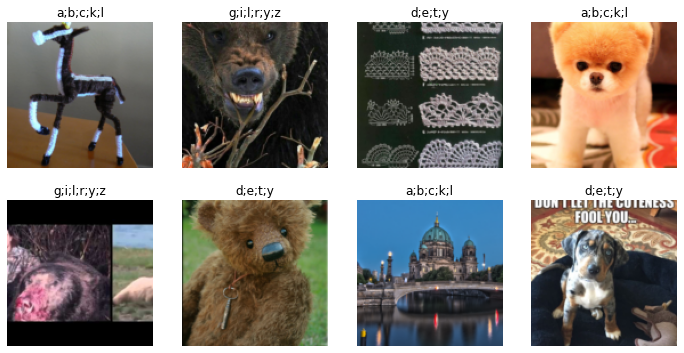

In [39]:
dls.train.show_batch(max_n=8, nrows=2)

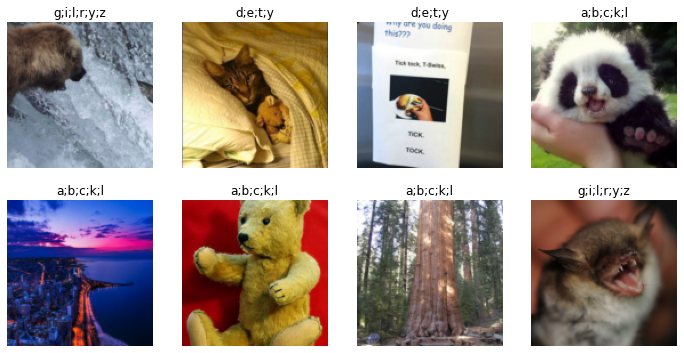

In [40]:
dls.valid.show_batch(max_n=8, nrows=2)